<a href="https://colab.research.google.com/github/prasadanvekar/elvtrdocs/blob/main/jan18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cvxpy


The Optimal Allocation for Stocks ABC, XYZ, and ZZZ are:
['76.2%' '23.8%' '0.0%']


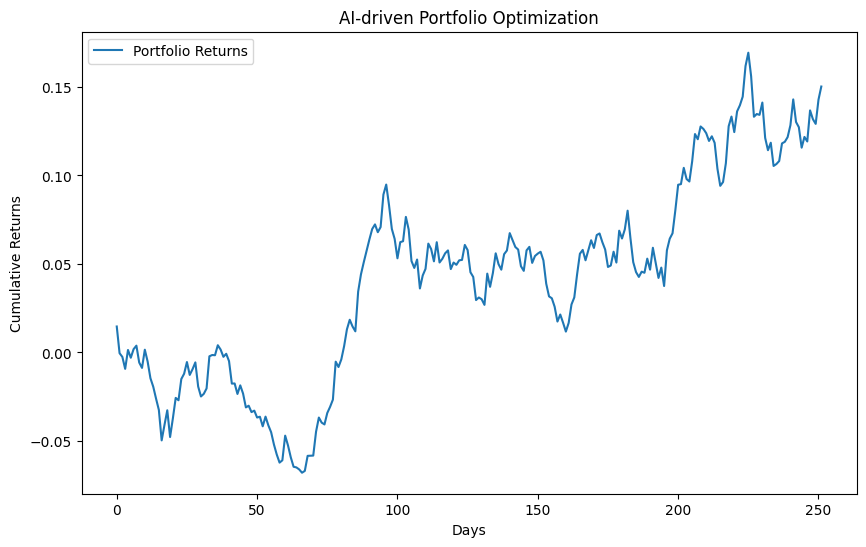

In [ ]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Load historical price data (replace with your own data)
# For simplicity, we'll use randomly generated data here.
np.random.seed(3)
num_assets = 3
num_days = 252
returns = np.random.randn(num_days, num_assets) / 100  # Replace with your actual returns data

# Convert returns to prices
prices = np.cumprod(1 + returns, axis=0)

# Define the portfolio optimization function
def optimize_portfolio(returns):
    num_assets = returns.shape[1]

    # Variables to optimize
    weights = cp.Variable(num_assets)

    # Objective: Maximize the Sharpe ratio (excess return / volatility)
    excess_return = cp.sum(returns @ weights) / num_days
    volatility = cp.norm(weights @ np.cov(returns, rowvar=False))
    objective = cp.Maximize(excess_return - volatility)

    # Constraints: Sum of weights is 1, each weight is between 0 and 1
    constraints = [cp.sum(weights) == 1, weights >= 0, weights <= 1]

    # Solve the optimization problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # Get optimized weights
    optimal_weights = weights.value

    return optimal_weights

# Run portfolio optimization and print optimal allocation
optimal_weights = optimize_portfolio(returns)

formatted_percentage = np.vectorize(lambda x: f"{x*100:.1f}%")
result = formatted_percentage(optimal_weights)
print("The Optimal Allocation for Stocks ABC, XYZ, and ZZZ are:")
print(result)

# Calculate the portfolio returns
portfolio_returns = np.dot(returns, optimal_weights)

# Plot the portfolio returns
plt.figure(figsize=(10, 6))
plt.plot(np.cumprod(1 + portfolio_returns) - 1, label='Portfolio Returns')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.title('AI-driven Portfolio Optimization')
plt.legend()
plt.show()